In [2]:
# import sklearn (predictive data analysis tool)
from sklearn.datasets import fetch_openml

# download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)

# extract feature matrix X and show 5 random samples
df_X = dataset["frame"]

# 1. Structure Investigation

A first look at the general structure of the dataset. For example, how many columns and rows does the dataset have and how many differents
data types do those features include?

In [3]:
# discovering the dataframe dimensions 
df_X.shape

(363243, 67)

In [4]:
import pandas as pd

In [5]:
# discovering how many different data types 
pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

In [6]:
# investigating how many unique values each non-numerical feature has
df_X.describe(exclude="number")

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,363243,319866,319822,319866,298758
unique,140056,3,365,1439,204,25979
top,201543P296025,1.0,14/02/2015,17:30,E10000017,E01028497
freq,1332,238639,2144,2972,8457,1456


In [7]:
# for each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()

<AxesSubplot:title={'center':'Unique values per feature'}>

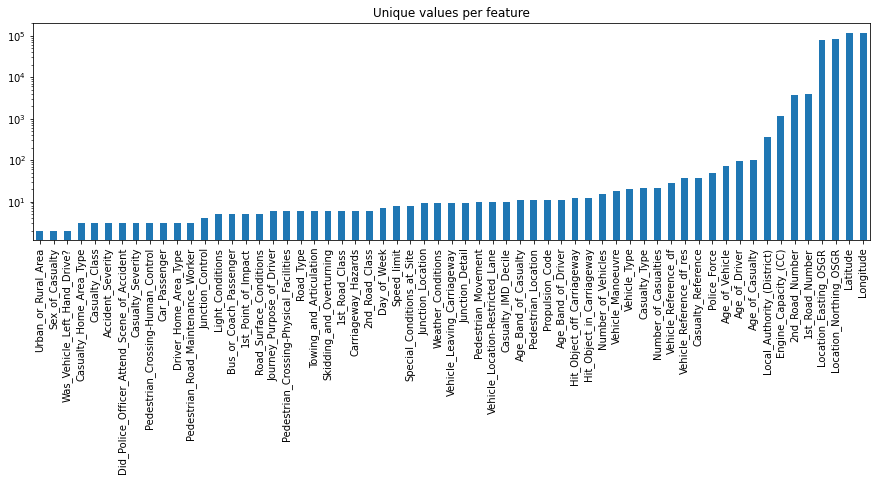

In [8]:
# plot information 
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

## Conclusion of structure investigation:

At the end of this first investigation we should have a better understanding of the general structure of our dataset.

# 2. Quality Investigation

The goal is to have a global view on the dataset with regards to things like _duplicates_, _missing values_, and _unwanted entries_ or _recording errors_.

## 2.1. Duplicates

In [9]:
# checking the number of duplicates (ignoring the index feature)
n_duplicates = df_X.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print('You seem to have {} duplicates in your database.'.format(n_duplicates))

You seem to have 22 duplicates in your database.


In [10]:
# extracting column names of all features except 'Accident_Index'
columns_to_consider = df_X.drop(labels=["Accident_Index"], axis=1).columns

In [11]:
# drop duplicates based on 'columns_to_consider"
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape

(363221, 67)

## 2.2. Missing values

Another quality issue worth to investigate are __missing values__. 

### 2.2.1. Per sample

To look at number of missing values per sample we have multiple options. The most straight forward one is to simply visualize the output of __df_X.sina()__.

Text(0, 0.5, 'Sample Number')

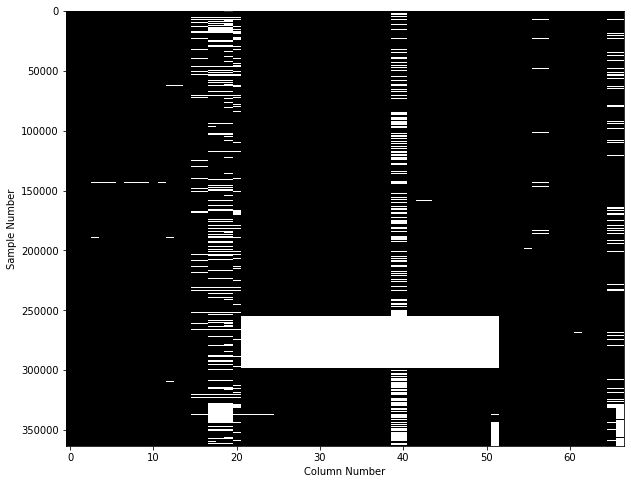

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

While this was already a useful plot, an even better approach is to use the __missingno__ library, to get a plot like this one:

<AxesSubplot:>

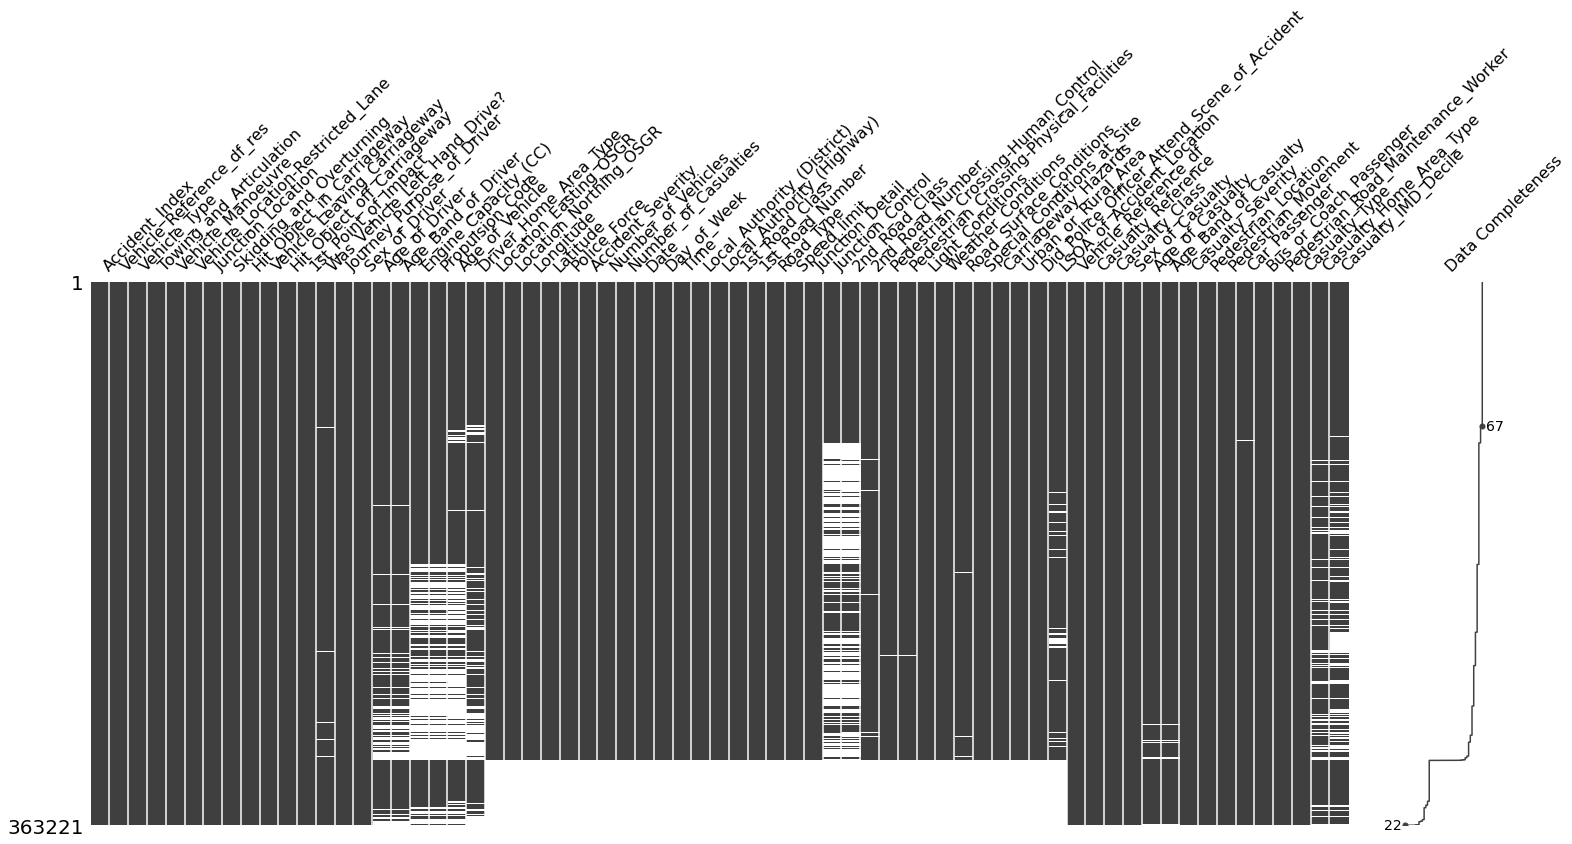

In [13]:
import missingno as msno
msno.matrix(df_X, labels=True, sort="descending")

From both of these plots we can see that the dataset has a huge hole, caused by some samples where more than 50% of the features values are missing.

Therefore, let's go ahead and drop samples that have more than 20% of missing values. The threshold is inspired by the information from the 'Data Completeness' column on the right of this figure.

In [14]:
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.8, axis=0).reset_index(drop=True)
df_X.shape

(319790, 67)

### Per feature

Let's now look at the number of missing values per feature. For this we can use some __pandas__ trickery to quickly identify the ratio of missing values __per feature__. 

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

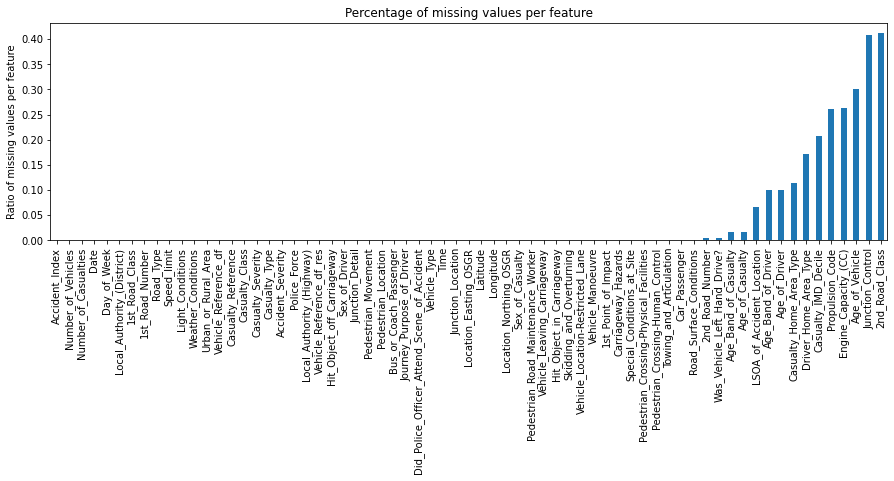

In [15]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

From this figure we can see that most features don't contain any missing values. Let's go ahead and remove any feature with more than 15% of missing values

In [16]:
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

(319790, 60)

## 2.3. Unwanted entries and recording errors

Unwanted entries or recording errors are samples that shoundn't be there in te first place.

For exemple a temperature recording of 45o celsius in Switzerland might be an outlier (as in 'very unusual'), while a recording at 90o celsius would be a error.

### 2.3.1. Numerical features

To plot this global view of the dataset, at least for the numerical features, you can use pandas' _.plot()_ function and combine it with the following parameters:

- _lw=0_: _lw_ stands for line width. _0_ means that we don't want to show any lines
- _marker="."_: instead of lines, we tell the plot to use . as marker for each data point
- _subplots=True_: _subplots_ tells _pandas_ to plot each feature in a separate subplot
- _layout=(-1,4)_: this parameter tells _pandas_ how many rows and columns to use for the subplot. The _-1_ means "as many as needed", while the _2_ means to use 2 columns per row
- _figsize=(15, 30), markersize=1_: to make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the _markersize_ accordingly.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplo

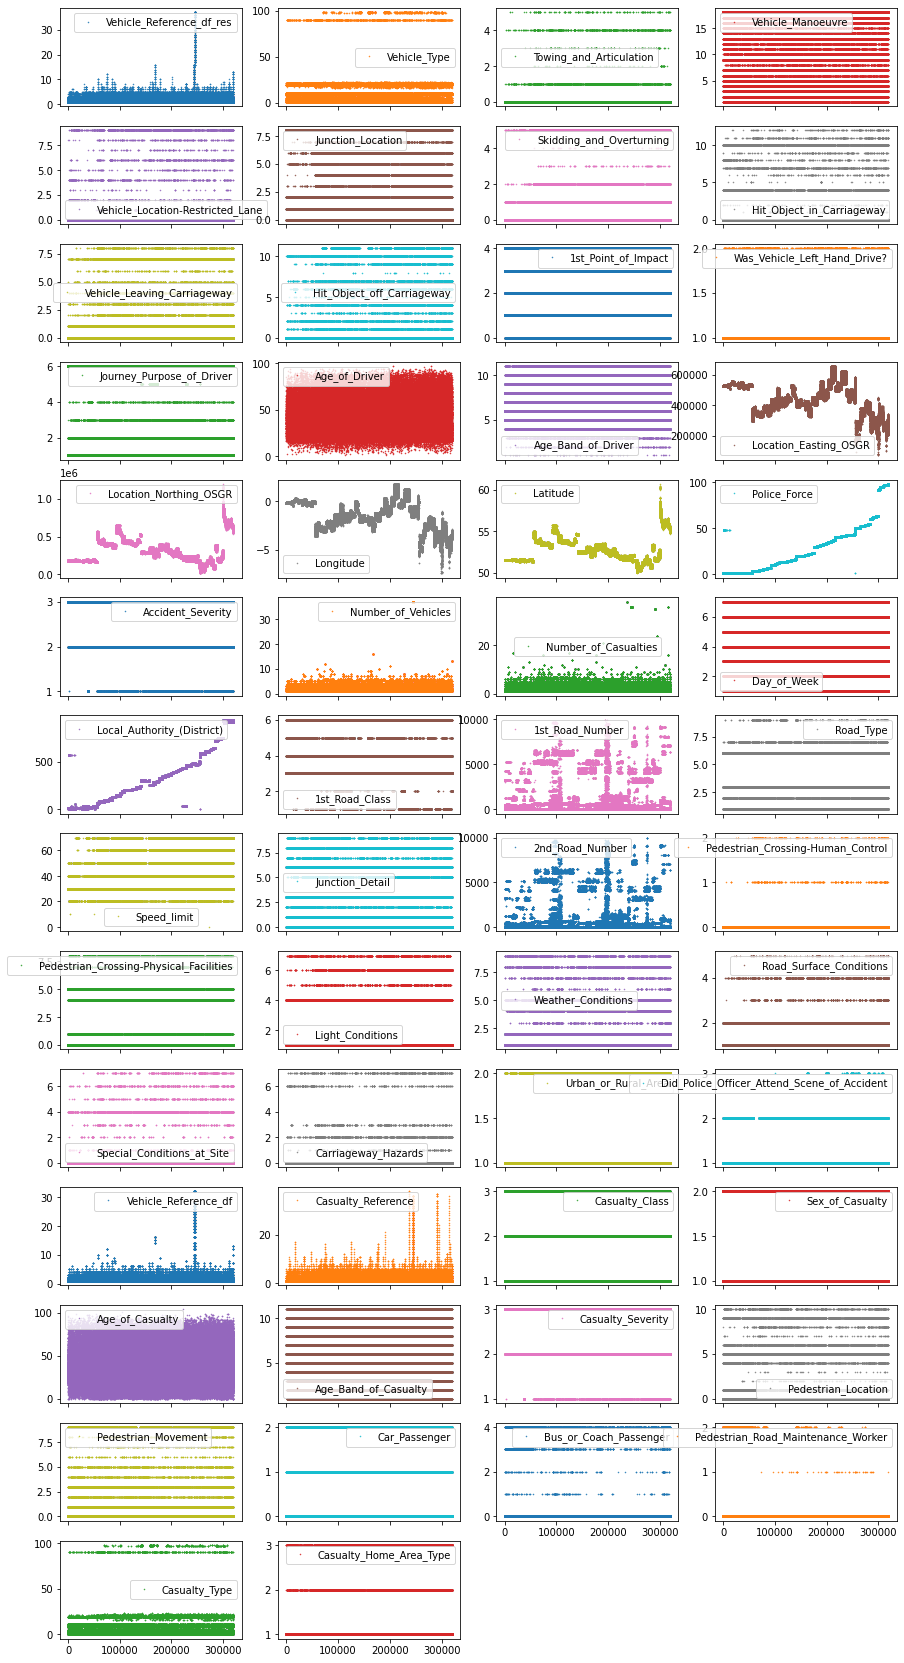

In [17]:
df_X.plot(lw=0,
            marker=".",
            subplots=True,
            layout=(-1, 4),
            figsize=(15, 30),
            markersize=1)

### 2.3.2. Non-numerical features

Identifying __unwanted entries__ or __recording errors__ on nom-numerical features is a bit more tricky. Given that at this point, we only to investigate the general quality of the dataset. So what we can do is take a general look at how many unique values each of these non-numerial features contain, and how often their most frequent category is represented. To do so, we can use: 

In [18]:
df_X.describe(exclude=["number", "datetime"])

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,319790,319790,319790,319746,319790,298693
unique,123645,3,365,1439,204,25977
top,201543P296025,1.0,14/02/2015,17:30,E10000017,E01028497
freq,1332,211218,2144,2969,8457,1456


There are multiple ways for how you could potentially streamline the quality investigation for each individual non-numerical features. None of them is perfect, and all of them will require some follow up investigation. But for the purpose of showcasing one such a solution, what we could do is loop through all non-numerical features and plot for each of them the number of occurrences per unique value.

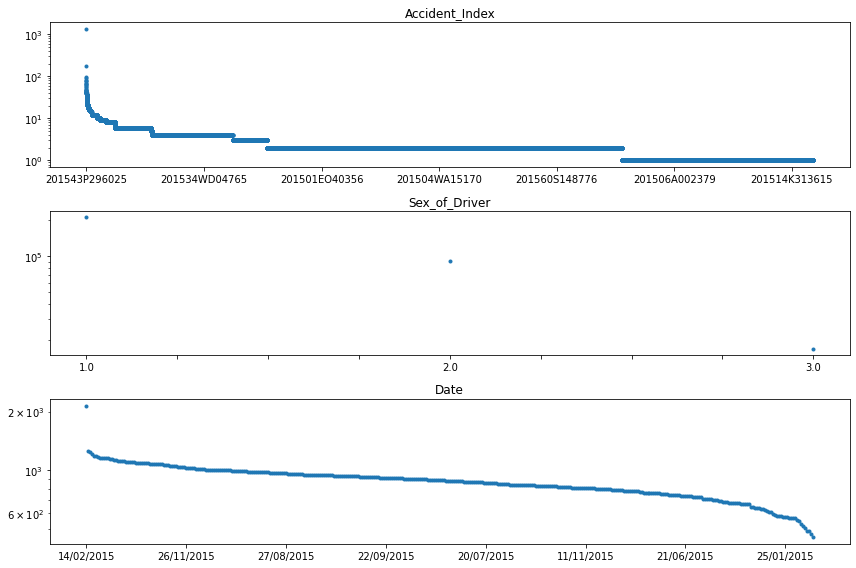

In [19]:
# create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

#identify non-numerical features
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])

# loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    # select one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(
        # plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)

plt.tight_layout()

We can see that the most frequent accident (i.e. Accident_Index), had more than 100 people involved. Digging a bit deeper (i.e. looking at the individual features of this accident), we could identify that this accident happened on February 24th, 2015 at 11:55 in Cardiff UK. A quick internet search reveals that this entry corresponds to a luckily non-lethal accident including a minibus full of pensioners.

The decision for what should be done with such rather unique entries is once more left in the the subjective hands of the person analyzing the dataset. Without any good justification for WHY, and only with the intention to show you the HOW - let’s go ahead and remove the 10 most frequent accidents from this dataset.

In [20]:
# collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index

# removes accidents from the 'accident_ids' list
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape

(317665, 60)

## Conclusion of quality investigation

At the end of this second investigation, we should have a better understanding of the general quality of our dataset. We looked at duplicates, missing values and unwanted entries or recording errors. It is important to point out that we didn’t discuss yet how to address the remaining missing values or outliers in the dataset.

# Content Investigation

Here we'll explore three different aproaches that can give us a very quick overview of the content sotred in each feature and how they relate.

## 3.1 Feature distribution

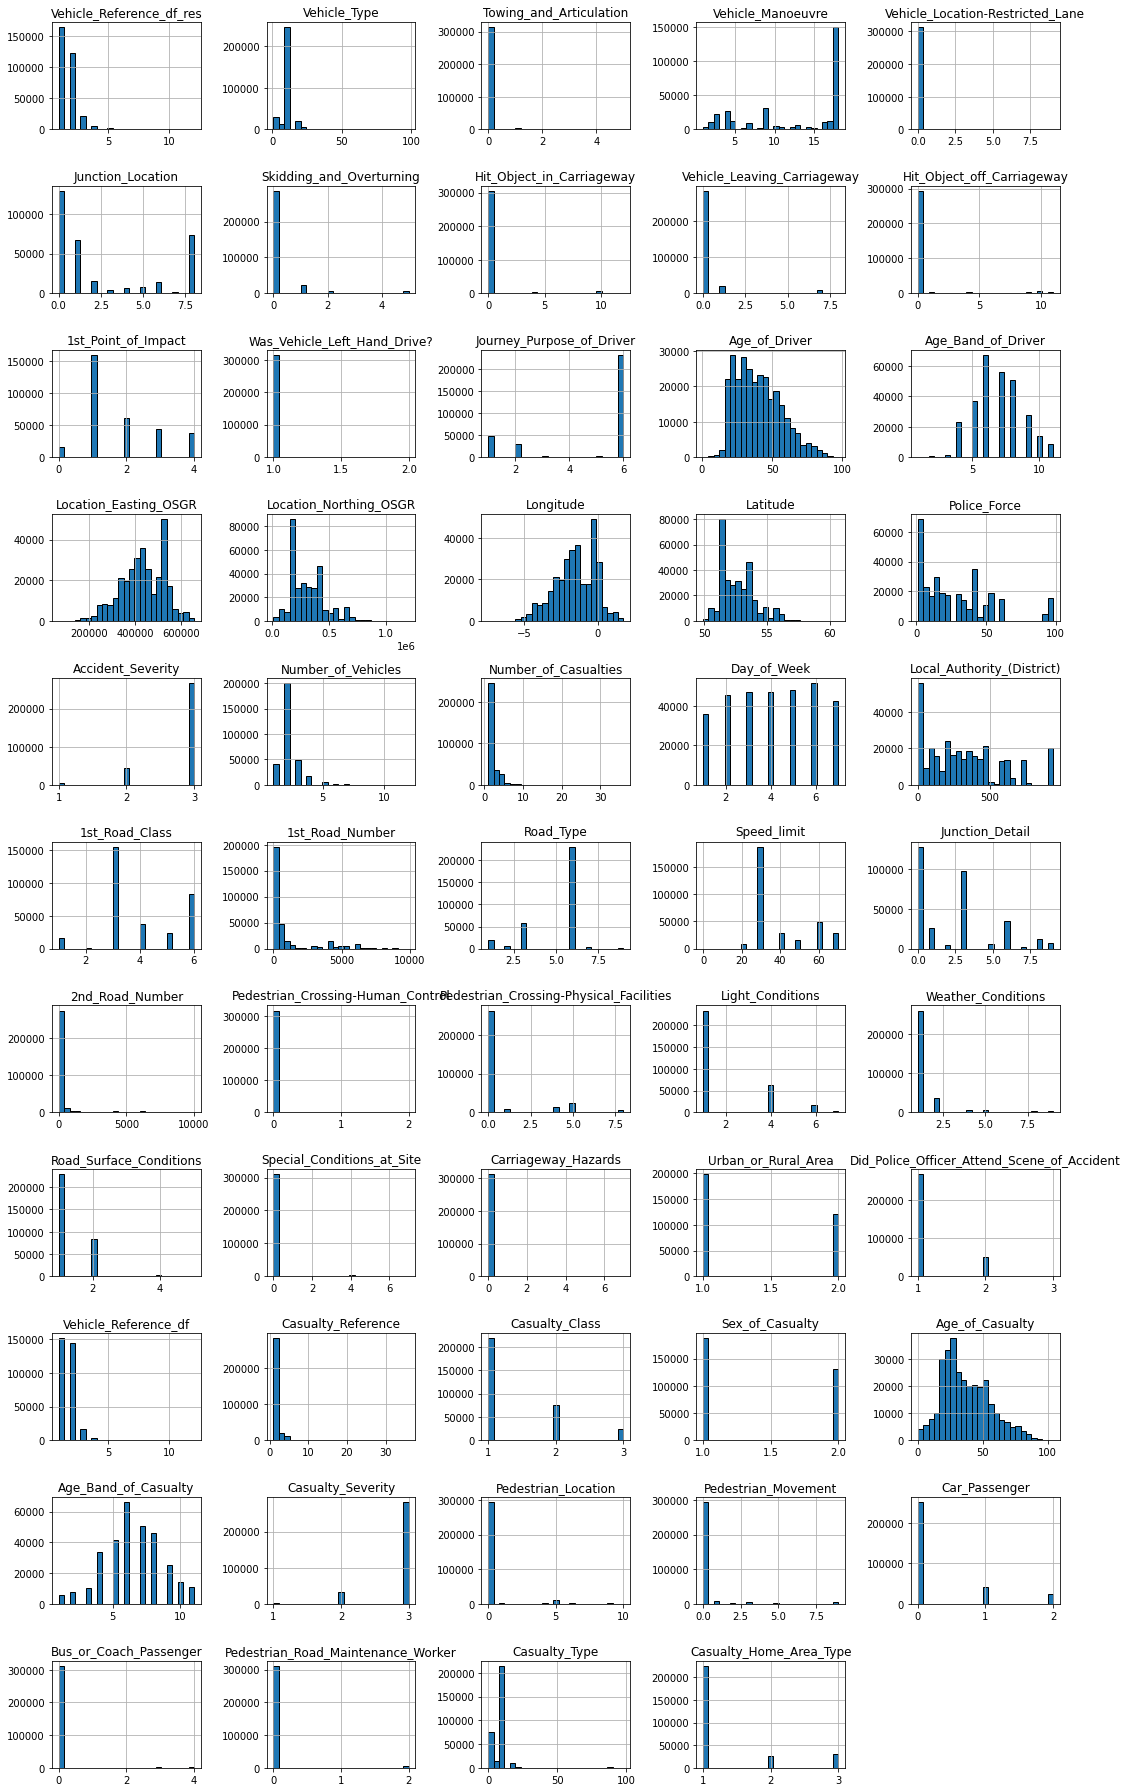

In [21]:
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

Some features mostly contain entries of just one category. Using the _.mode()_ function, we could for example extract the ratio of the most frequent entry for each feature and visualize that information.

Pedestrian_Crossing-Human_Control    0.995259
Was_Vehicle_Left_Hand_Drive?         0.990137
Carriageway_Hazards                  0.983646
Towing_and_Articulation              0.983221
Vehicle_Location-Restricted_Lane     0.982088
dtype: float64

<AxesSubplot:>

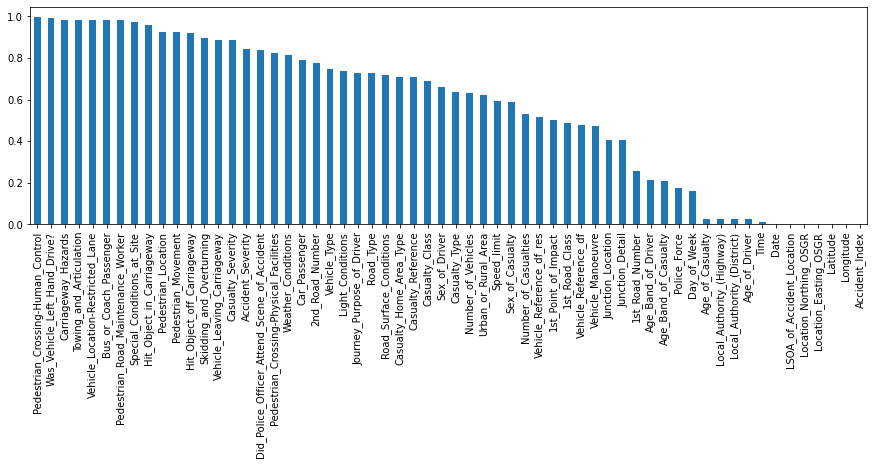

In [22]:
# collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()

# checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)

# computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4))




## 3.2. Feature patterns

Next step on the list is the investigation of feature specific patterns. The goal of this part is two fold:

- Can we identify particular patterns within a feature that will help us to decide if some entries need to be dropped or modified?
- Can we identify particular relationships between features that will help us to better understand our dataset?

Before we dive into these two questions, let’s take a closer look at a few ‘randomly selected’ features.

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

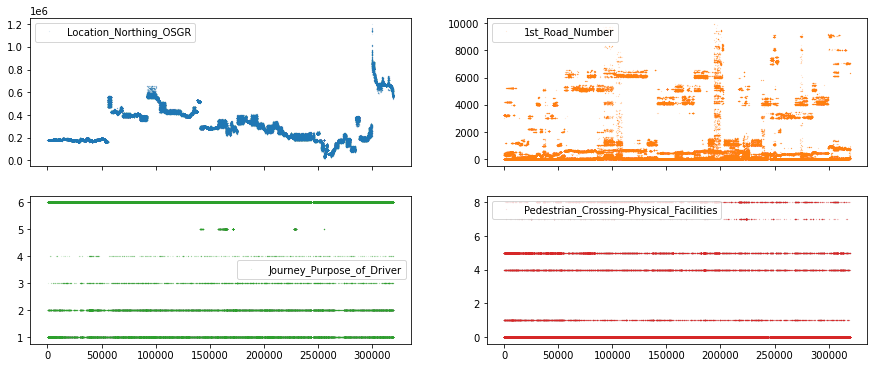

In [23]:
df_X[["Location_Northing_OSGR",
      "1st_Road_Number",
      "Journey_Purpose_of_Driver",
      "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2),
  markersize=0.1, figsize=(15, 6))

In the top row, we can see features with continuous values (e.g. seemingly any number from the number line), while in the bottom row we have features with discrete values (e.g. 1, 2, 3 but not 2.34)

While there are many ways we could explore our features for particular patterns, let’s simplify our option by deciding that we treat features with less than 25 unique features as discrete or ordinal features, and the other features as continuous features.

In [24]:
# Creates mask to identify numerical features with at least 25 unique features
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25

### 3.2.1. Continuous features

Now that we have a way to select the continuous features, let’s go ahead and use seaborn’s pairplot to visualize the relationships between these features. Important to note, seaborn's pairplot routine can take a long time to create all subplots. Therefore we recommend to not use it for more than ~10 features at a time.

Given that in our case we only have 11 features, we can go ahead with the pairplot. Otherwise, using something like df_continuous.iloc[:, :5] could help to reduce the number of features to plot.

In [25]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_X[cols_continuous[cols_continuous].index]
df_continuous.shape

(317665, 11)

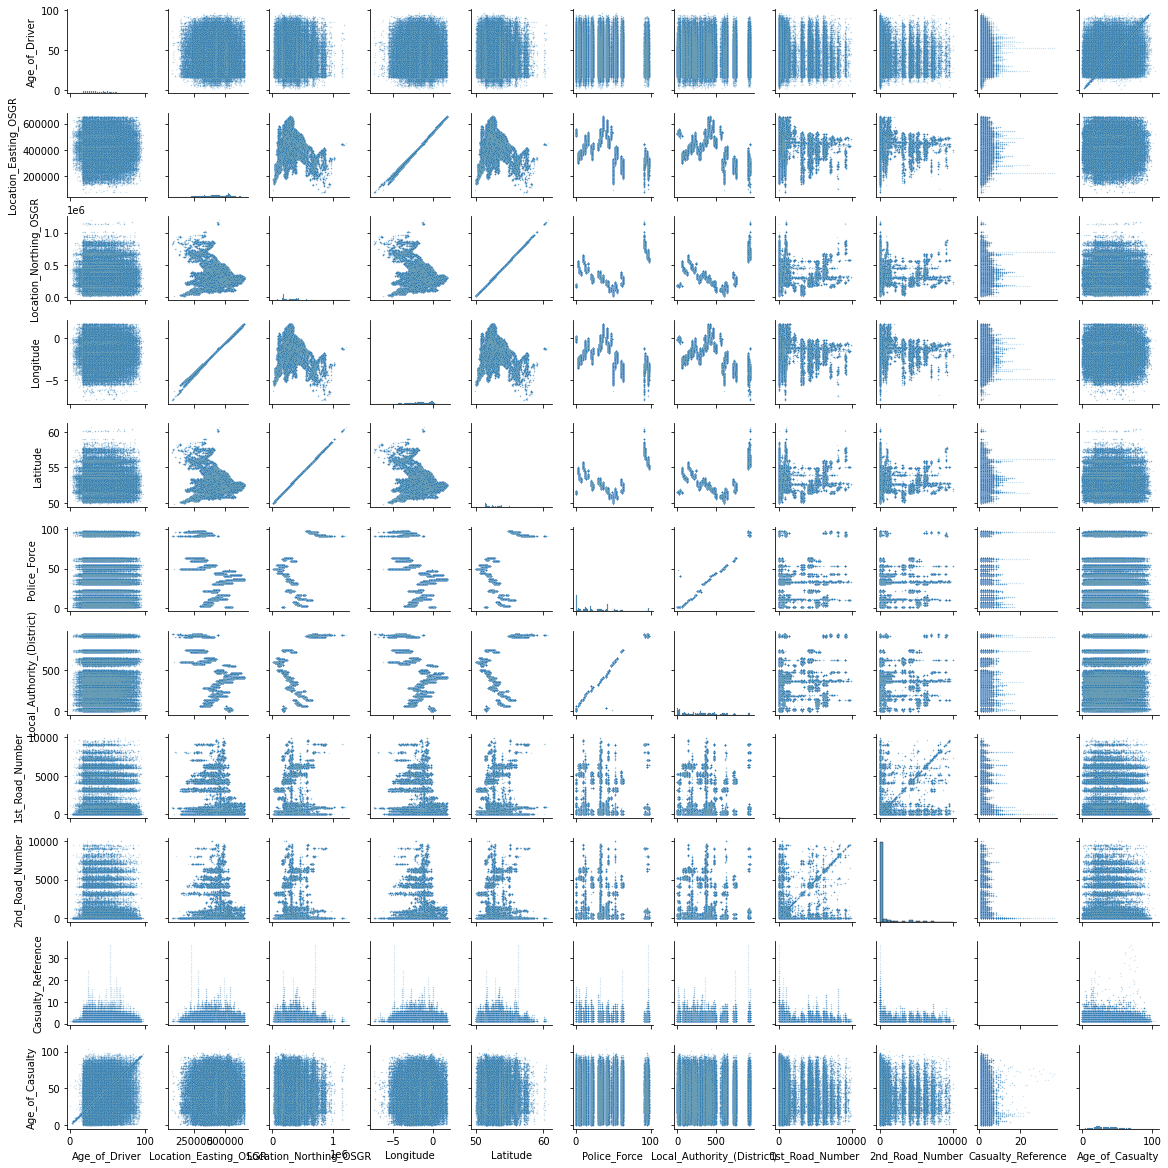

In [26]:
import seaborn as sns

sns.pairplot(df_continuous, height=1.5,
             plot_kws={"s": 2, "alpha": 0.2})

There seems to be a strange relationship between a few features in the top left corner. __Location_Easting_OSGR__ and __Longitude__, as well as __Location_Northing_OSGR__ and __Latitude__ seem to have a very strong linear relationship.

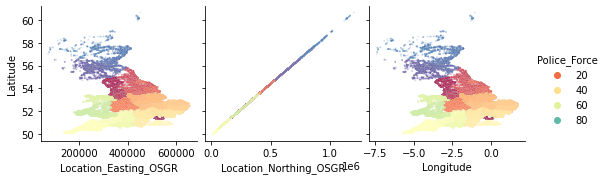

In [27]:
sns.pairplot(
    df_X,
  	plot_kws={"s": 3, "alpha": 0.2},
  	hue="Police_Force",
  	palette="Spectral",
    x_vars=["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude"],
    y_vars="Latitude")

### 3.2.2. Discrete and ordinal features

Finding patterns in the discrete or ordinal features is a bit more tricky. But also here, some quick pandas and seaborn trickery can help us to get a general overview of our dataset. First, let’s select the columns we want to investigate.

In [28]:
# Create a new dataframe which doesn't contain continuous features
df_discrete = df_X[cols_continuous[~cols_continuous].index]
df_discrete.shape

(317665, 43)

As always, there are multiple way for how we could investigate all of these features. Let’s try one example, using seaborn’s _stripplot()_ together with a handy _zip()_ for-loop for subplots.

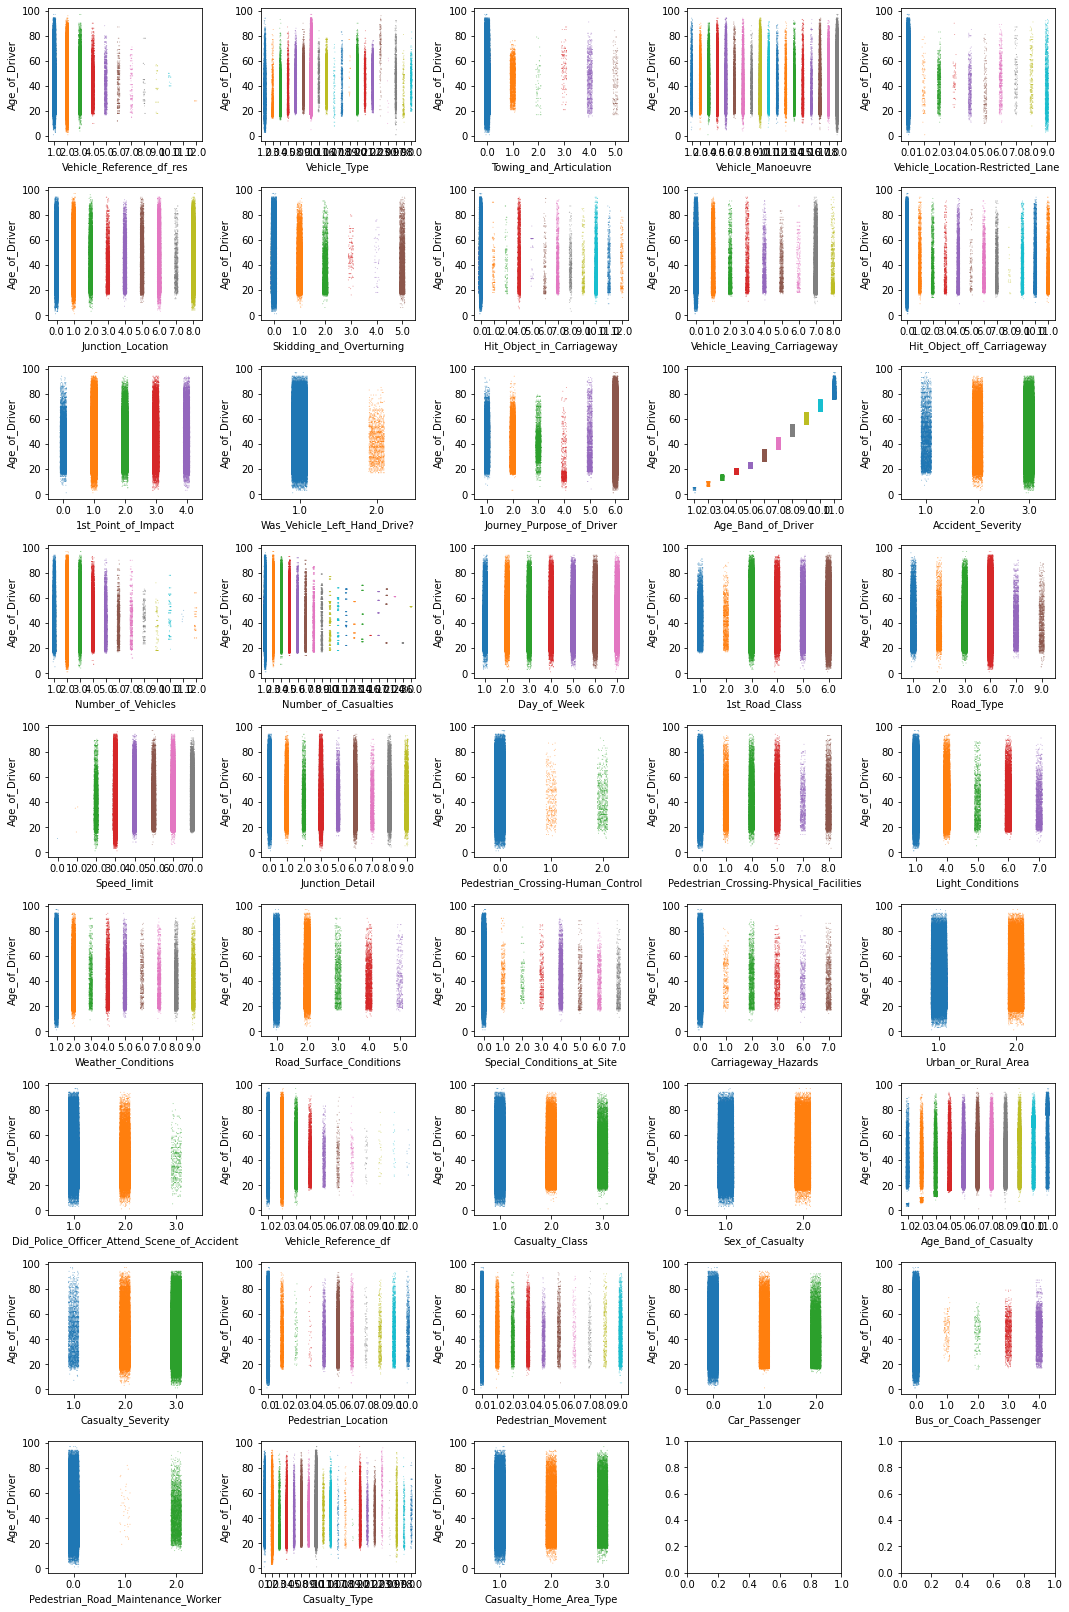

In [29]:
import numpy as np

# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df_X["Age_of_Driver"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(
  ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=y_value, ax=ax,
                  palette="tab10", size=1, alpha=0.5)
plt.tight_layout()

There are too many things to comment here, so let’s just focus on a few. In particular, let’s focus on 6 features where the values appear in some particular pattern or where some categories seem to be much less frequent than others. And to shake things up a bit, let’s now use the _Longitude_ feature to stretch the values over the y-axis.

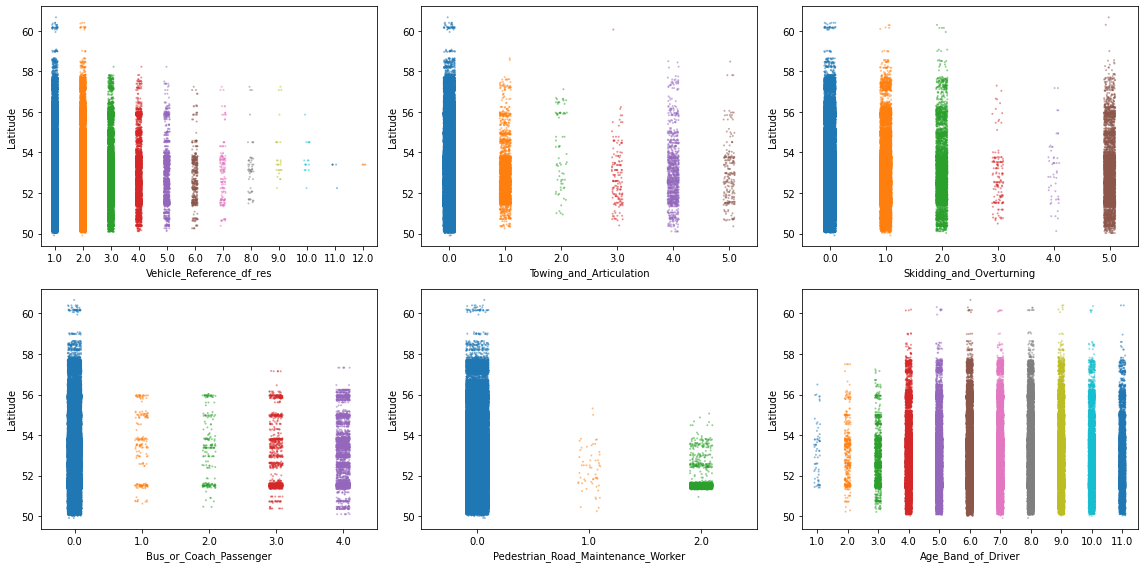

In [30]:
# Specify features of interest
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout()

These kind of plots are already very informative, but they obscure regions where there are a lot of data points at once. For example, there seems to be a high density of points in some of the plots at the 52nd latitude. So let’s take a closer look with an appropriate plot, such as _violineplot_ ( or _boxenplot_ or _boxplot_ for that matter). And to go a step further, let's also separate each visualization by _Urban_or_Rural_Area_.

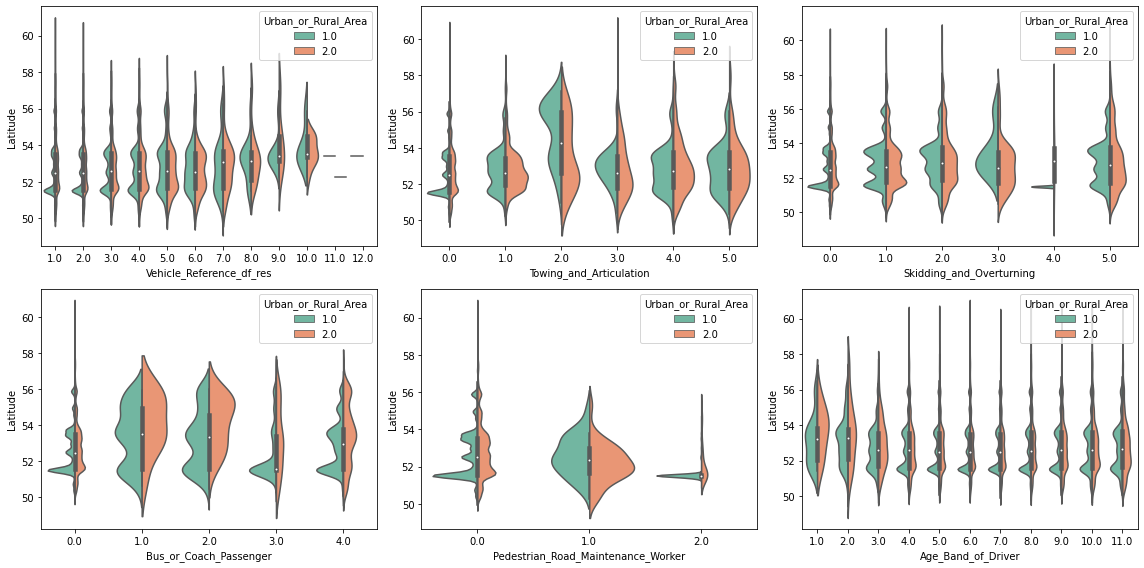

In [31]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df_X, x=col, y=df_X["Latitude"], palette="Set2",
                   split=True, hue="Urban_or_Rural_Area", ax=ax)
plt.tight_layout()

We can see that some values on features are more frequent in urban, than in rural areas (and vice versa). Furthermore, as suspected, there seems to be a high density peak at latitude 51.5. This is very likely due to the more densely populated region around London (at 51.5074°).

## 3.2. Feature relationships

Let’s take a look at relationships between features. More precisely how they correlate. The quickest way to do so is via pandas’ _.corr()_ function. So let's go ahead and compute the feature to feature correlation matrix for all numerical features.

<AxesSubplot:>

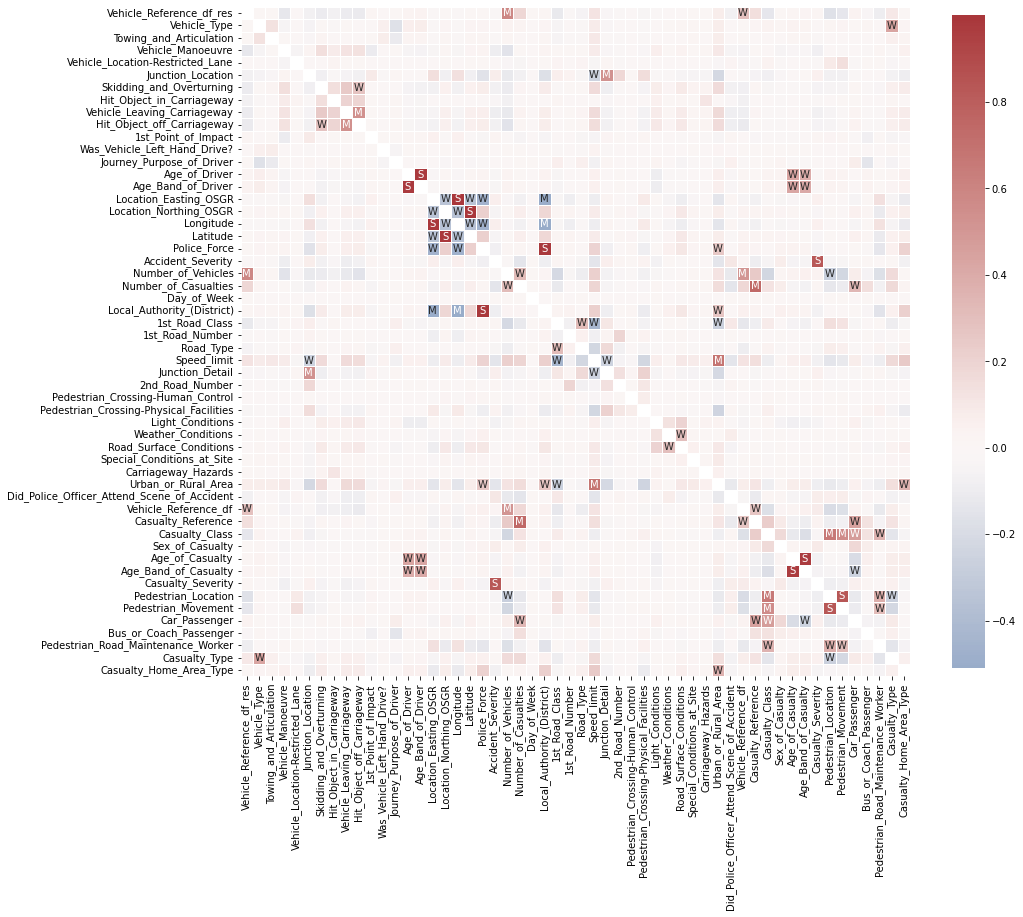

In [32]:
# Computes feature correlation
df_corr = df_X.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

This looks already very interesting. We can see a few very strong correlations between some of the features. Now, if you’re interested actually ordering all of these different correlations, you could do something like this:

In [33]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

Local_Authority_(District)  Longitude                -0.509343
                            Location_Easting_OSGR    -0.502919
Police_Force                Longitude                -0.471327
                            Location_Easting_OSGR    -0.461112
Speed_limit                 1st_Road_Class           -0.438931
                                                        ...   
Age_Band_of_Casualty        Age_of_Casualty           0.974397
Age_Band_of_Driver          Age_of_Driver             0.979019
Local_Authority_(District)  Police_Force              0.984819
Longitude                   Location_Easting_OSGR     0.999363
Latitude                    Location_Northing_OSGR    0.999974
Length: 1431, dtype: float64

## 3.4. Conclusion of content investigation

At the end of this third investigation, we should have a better understanding of the content in our dataset. We looked at value distribution, feature patterns and feature correlations. However, these are certainly not all possible content investigation and data cleaning steps you could do. Additional steps would for example be outlier detection and removal, feature engineering and transformation, and more.